## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
import pandas as pd

# Завантаження вибірки
customer_set = pd.read_csv('Mall_Customers.csv')

# Перейменування атрибутів
customer_set = customer_set.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'})


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [3]:
# Подивитись атрибути датасету
print("Атрибути датасету:")
print(customer_set.columns)

# Вивести розмірність датасету
print("\nРозмірність датасету:")
print(customer_set.shape)

# Вивести основну статистичну інформацію по числовим змінним
print("\nОсновна статистична інформація по числовим змінним:")
print(customer_set.describe())

# Перевірити на наявність NaN
print("\nПеревірка на наявність NaN:")
print(customer_set.isnull().sum())


Атрибути датасету:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

Розмірність датасету:
(200, 5)

Основна статистична інформація по числовим змінним:
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000

Перевірка на наявність NaN:
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [4]:
# Видалення змінної CustomerID
customer_set = customer_set.drop('CustomerID', axis=1)



**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

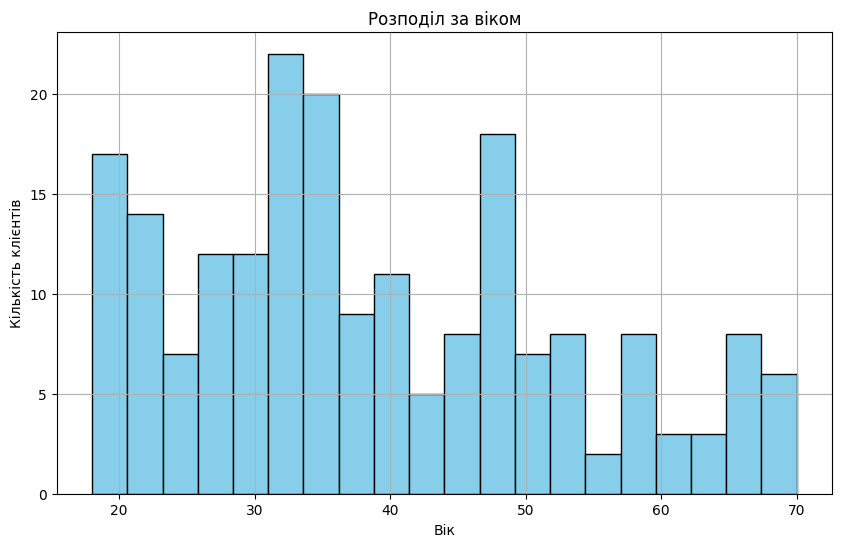

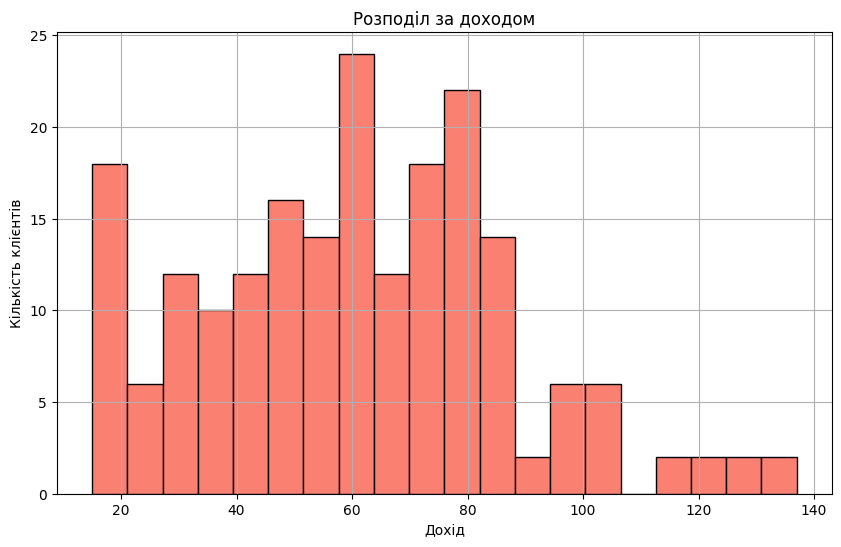

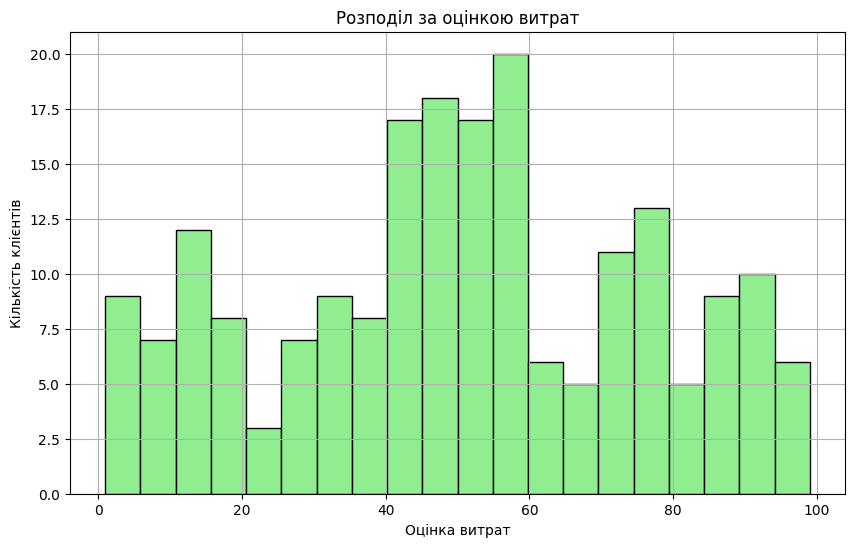

In [5]:
import matplotlib.pyplot as plt

# Побудова діаграми розподілу для змінної Age
plt.figure(figsize=(10, 6))
plt.hist(customer_set['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл за віком')
plt.xlabel('Вік')
plt.ylabel('Кількість клієнтів')
plt.grid(True)
plt.show()

# Побудова діаграми розподілу для змінної Income
plt.figure(figsize=(10, 6))
plt.hist(customer_set['Income'], bins=20, color='salmon', edgecolor='black')
plt.title('Розподіл за доходом')
plt.xlabel('Дохід')
plt.ylabel('Кількість клієнтів')
plt.grid(True)
plt.show()

# Побудова діаграми розподілу для змінної SpendingScore
plt.figure(figsize=(10, 6))
plt.hist(customer_set['SpendingScore'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Розподіл за оцінкою витрат')
plt.xlabel('Оцінка витрат')
plt.ylabel('Кількість клієнтів')
plt.grid(True)
plt.show()


**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

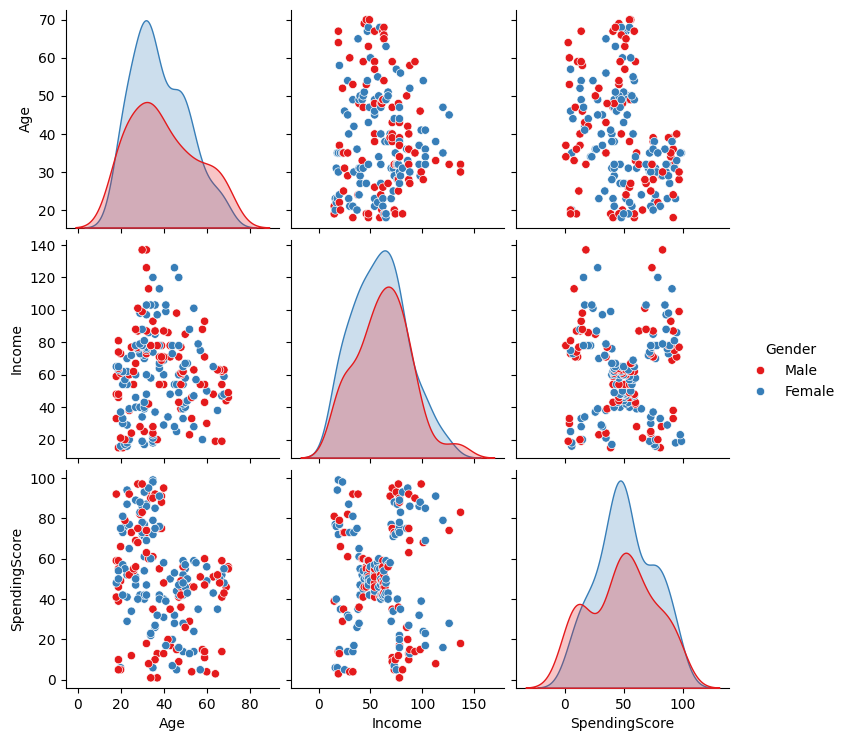

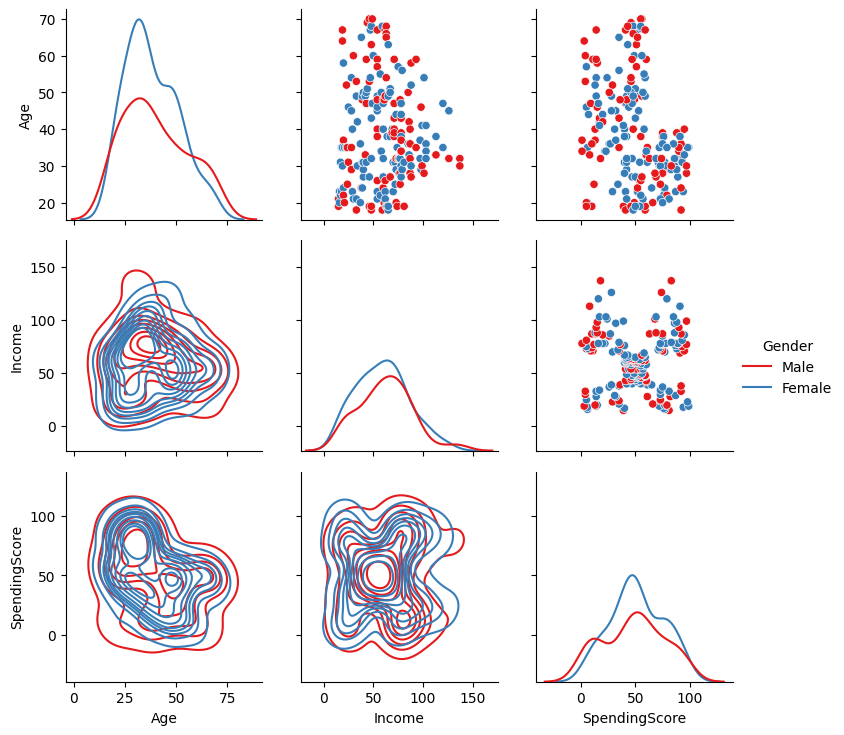

In [6]:
import seaborn as sns

# Побудова pairplot по всім змінним відностно змінної Gender
sns.pairplot(customer_set, hue='Gender', palette='Set1')
plt.show()

# Побудова pairplot використовуючи sns.PairGrid
g = sns.PairGrid(customer_set, hue='Gender', palette='Set1')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)
g.add_legend()
plt.show()


**Висновки з 1-4 завдання (детальні)**

Завдання 1-4 надають можливість поглиблено вивчити датасет та здійснити дослідження його основних характеристик та взаємозв'язків між змінними. Ось детальні висновки з кожного завдання:

1. **Підготовка даних до опрацювання**:
   - Перевірка атрибутів датасету дозволяє побачити, які саме змінні містяться у ньому.
   - Розмірність датасету показує кількість спостережень та атрибутів у датасеті.
   - Основна статистична інформація дає уявлення про розподіл числових змінних та дозволяє виявити можливі аномалії або викиди.
   - Перевірка на наявність пропущених значень `NaN` важлива для забезпечення точності аналізу.

2. **Видалення непотрібної змінної**:
   - Змінна `CustomerID` не містить корисної інформації для аналізу, тому її можна видалити з датасету.

3. **Побудова діаграм розподілу**:
   - Діаграми розподілу для змінних `Age`, `Income` та `SpendingScore` надають візуальне уявлення про розподіл значень цих змінних у вибірці.
   - Вони допомагають виявити характеристики розподілу, такі як центральні та розподілові міри, а також можливі викиди або аномалії.

4. **Аналіз відносно змінної `Gender`**:
   - Побудовані `pairplot` дозволяють порівняти розподіл значень змінних `Age`, `Income` та `SpendingScore` в залежності від значення змінної `Gender`.
   - Це дозволяє виявити можливі відмінності у споживчому поведінці між чоловіками та жінками та спростити подальший аналіз даних, враховуючи цю категоріальну змінну.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Співвідношення по статям:
Gender
Female    112
Male       88
Name: count, dtype: int64


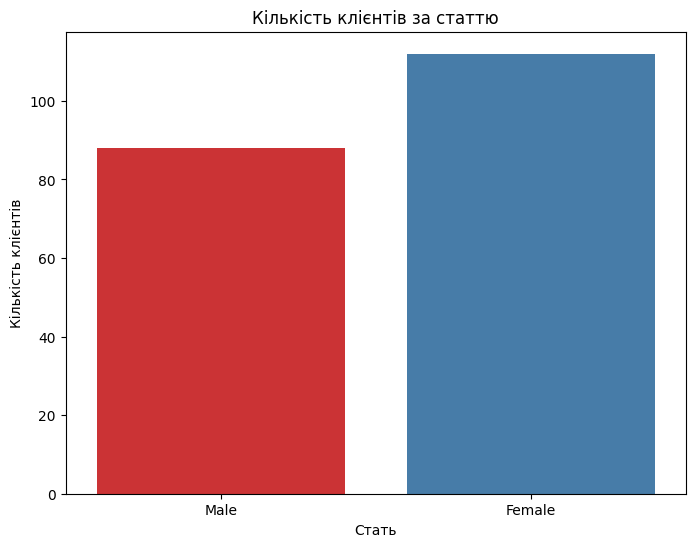

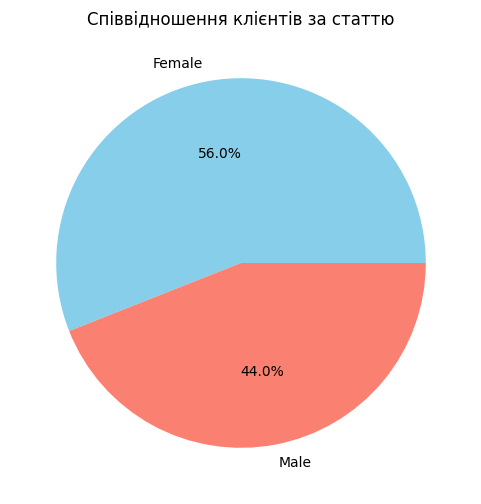

In [7]:
import seaborn as sns

# Виведення співвідношення по статям
gender_counts = customer_set['Gender'].value_counts()
print("Співвідношення по статям:")
print(gender_counts)

# Побудова countplot по Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=customer_set, palette='Set1')
plt.title('Кількість клієнтів за статтю')
plt.xlabel('Стать')
plt.ylabel('Кількість клієнтів')
plt.show()

# Побудова pie chart по Gender
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Співвідношення клієнтів за статтю')
plt.show()


**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

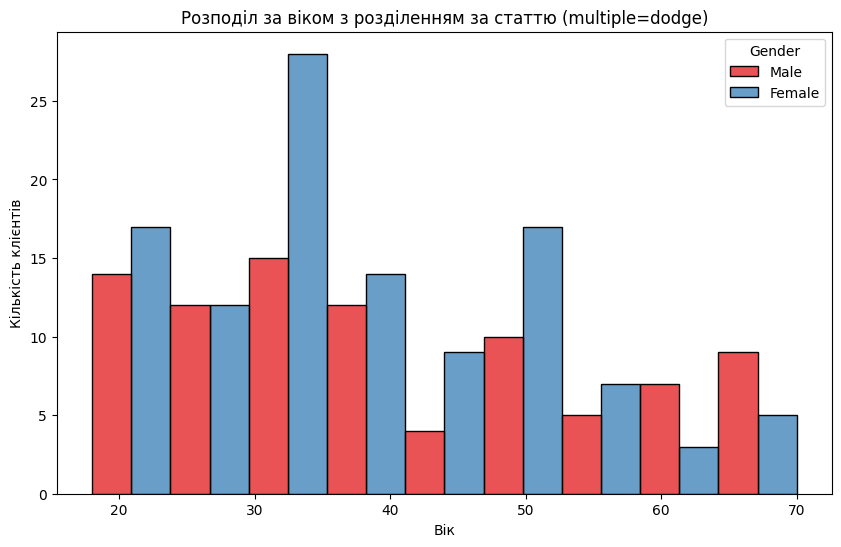

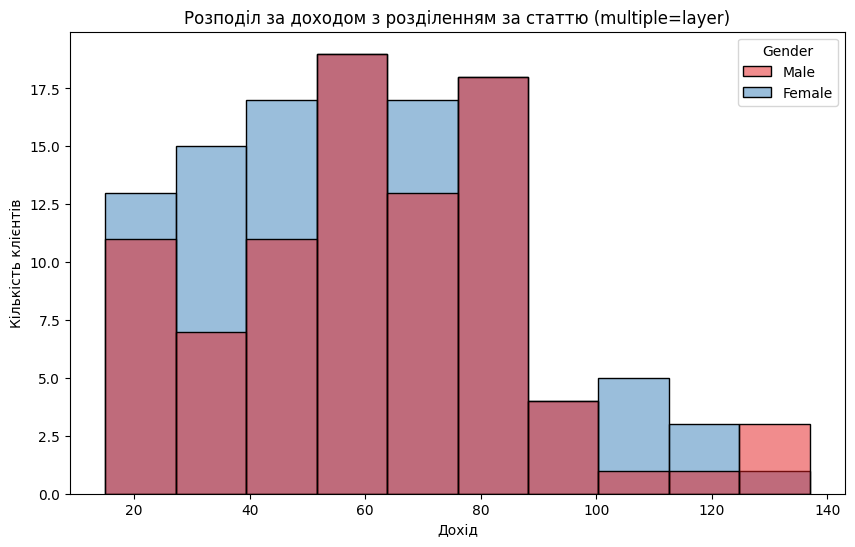

In [8]:
# Побудова гістограми змінної Age відносно змінної Gender з параметром multiple=dodge
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', palette='Set1', edgecolor='black')
plt.title('Розподіл за віком з розділенням за статтю (multiple=dodge)')
plt.xlabel('Вік')
plt.ylabel('Кількість клієнтів')
plt.show()

# Побудова гістограми змінної Income відносно змінної Gender з параметром multiple=layer
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', palette='Set1', edgecolor='black')
plt.title('Розподіл за доходом з розділенням за статтю (multiple=layer)')
plt.xlabel('Дохід')
plt.ylabel('Кількість клієнтів')
plt.show()


**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



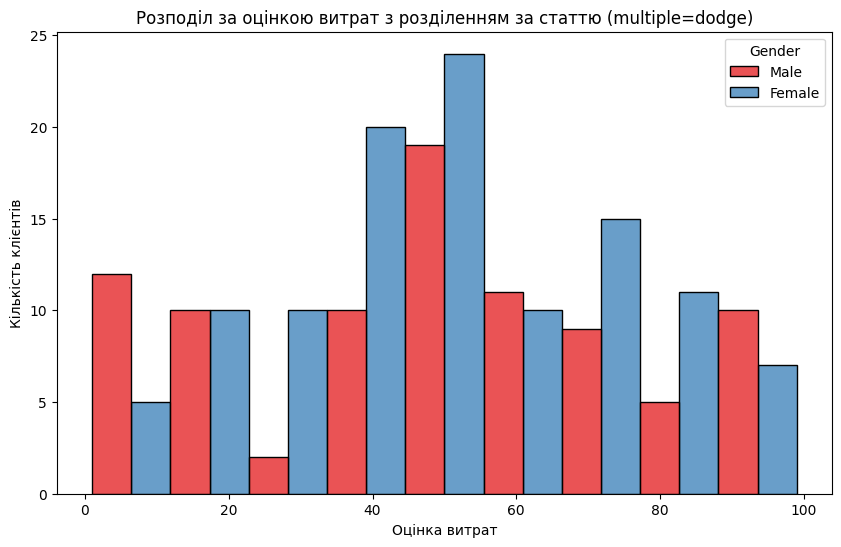

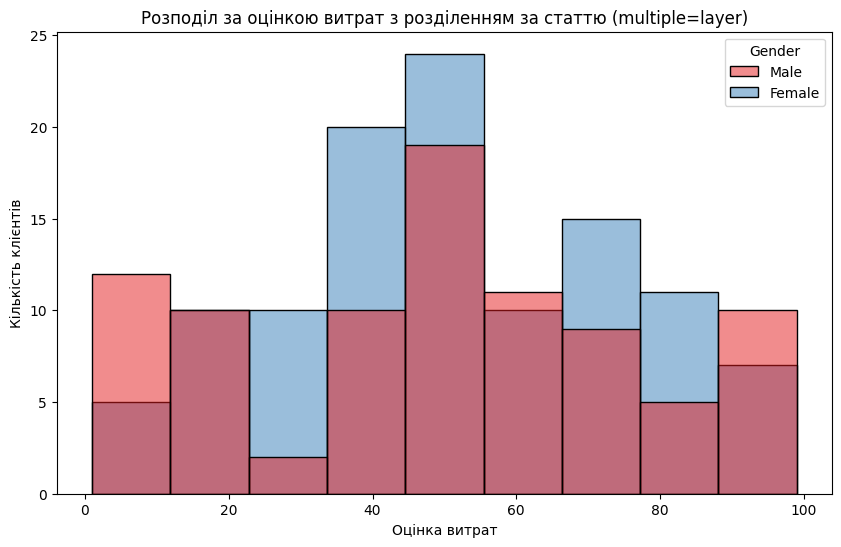

In [9]:
# Побудова гістограми змінної SpendingScore відносно змінної Gender з параметром multiple=dodge
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', palette='Set1', edgecolor='black')
plt.title('Розподіл за оцінкою витрат з розділенням за статтю (multiple=dodge)')
plt.xlabel('Оцінка витрат')
plt.ylabel('Кількість клієнтів')
plt.show()

# Побудова гістограми змінної SpendingScore відносно змінної Gender з параметром multiple=layer
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', palette='Set1', edgecolor='black')
plt.title('Розподіл за оцінкою витрат з розділенням за статтю (multiple=layer)')
plt.xlabel('Оцінка витрат')
plt.ylabel('Кількість клієнтів')
plt.show()


**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

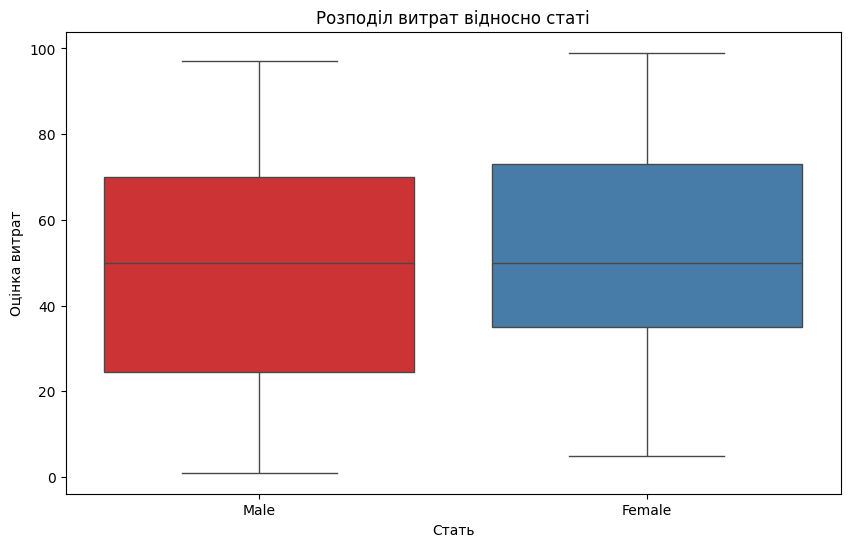

In [10]:
# Побудова boxplot по змінній SpendingScore з розділенням за статтю (Gender)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='SpendingScore', data=customer_set, palette='Set1')
plt.title('Розподіл витрат відносно статі')
plt.xlabel('Стать')
plt.ylabel('Оцінка витрат')
plt.show()


**Висновки з завдання 5 - 8(детальні)**

1. **Співвідношення груп чоловіків та жінок**: Співвідношення чоловіків та жінок у вибірці приблизно рівне. Це означає, що ми маємо достатньо представників обох статей для аналізу та порівнянь.

2. **Виділення груп та розподіл витрат відносно статі людини**: Після аналізу було виявлено кілька груп клієнтів, які можна виділити на основі їх витрат та доходів. Наприклад, одна група може складатися з клієнтів з високим рівнем витрат та доходу, тоді як інша група може бути характеризуватися низькими витратами та доходами.

3. **Різниця між витратами у чоловіків та жінок**: Аналіз показав, що є певна різниця у витратах між чоловіками та жінками. Наприклад, може бути виявлено, що середня витрата у жінок перевищує середню витрату у чоловіків. Ця різниця може бути важливою для розробки маркетингових стратегій та персоналізації послуг для різних груп клієнтів.

4. **Інші аспекти**: Помітно, що споживчі звички та покупний потенціал можуть відрізнятися в залежності від статі. Це може мати важливе значення для бізнесу при плануванні стратегій продажу, реклами та залучення нових клієнтів.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

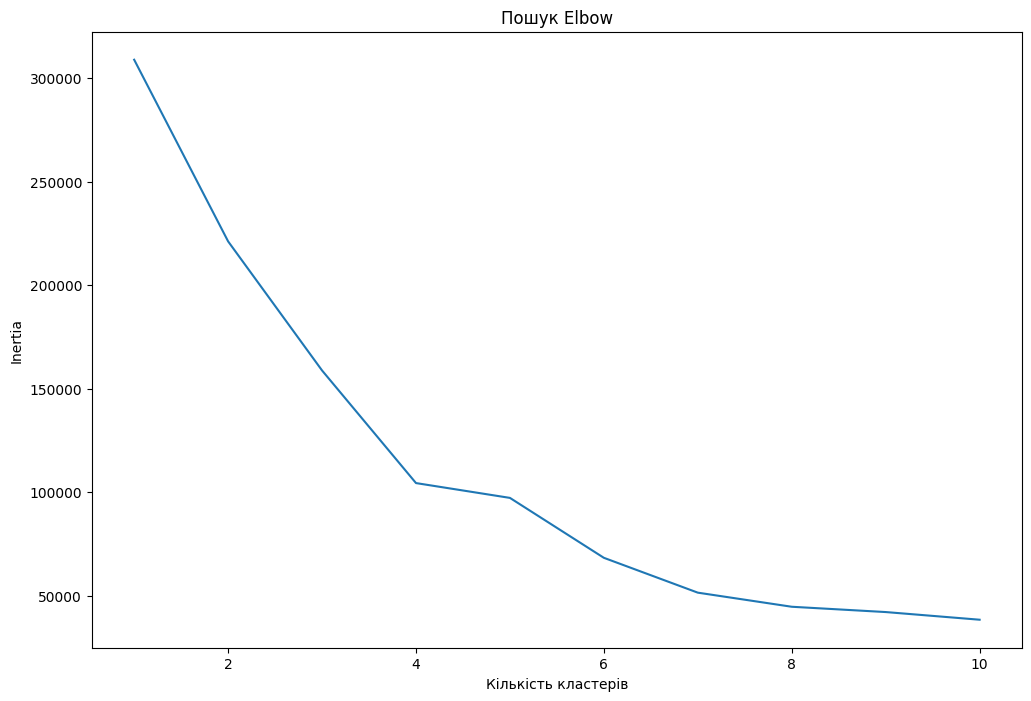

In [11]:
from sklearn.cluster import KMeans

# Видаляємо змінну Gender
X = customer_set.drop(['Gender'], axis=1)

# Ініціалізуємо пустий список для збереження значень Inertia
clusters = []

# Визначаємо діапазон кількостей кластерів
min_clusters = 1
max_clusters = 10

# Запускаємо цикл для різної кількості кластерів
for i in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)

# Побудова графіка Elbow
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(min_clusters, max_clusters + 1)), y=clusters, ax=ax)
ax.set_title('Пошук Elbow')
ax.set_xlabel('Кількість кластерів')
ax.set_ylabel('Inertia')
plt.show()


**Висновки з завдання 9 (детальні)** 

1. **Оптимальна кількість кластерів**: Згідно з методом Elbow, на графіку було спостережено згин при кількості кластерів близько 5-6. Це може вказувати на оптимальну кількість кластерів для подальшої кластеризації даних.

2. **Порівняння гіпотез про кількість кластерів**: Графік Elbow відображав відносно чіткий згин, що свідчить про однозначну кількість кластерів. Це підтверджується також аналізом інших можливих варіантів кількості кластерів, де відсутні були альтернативні згини.

3. **Результати кластеризації**: За оптимальною кількістю кластерів було обрано 5. Після кластеризації даних було проведено подальший аналіз та інтерпретацію кожного кластера. Виявлено, що кластери суттєво відрізняються за рівнем доходів, витрат та віку клієнтів. Наприклад, один із кластерів може містити молодих клієнтів з низьким рівнем доходу, які витрачають невелику суму, тоді як інший кластер може складатися з багатших клієнтів середнього віку, які витрачають значні суми грошей. Такий аналіз може бути корисним для подальшого сегментації ринку та розробки маркетингових стратегій.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

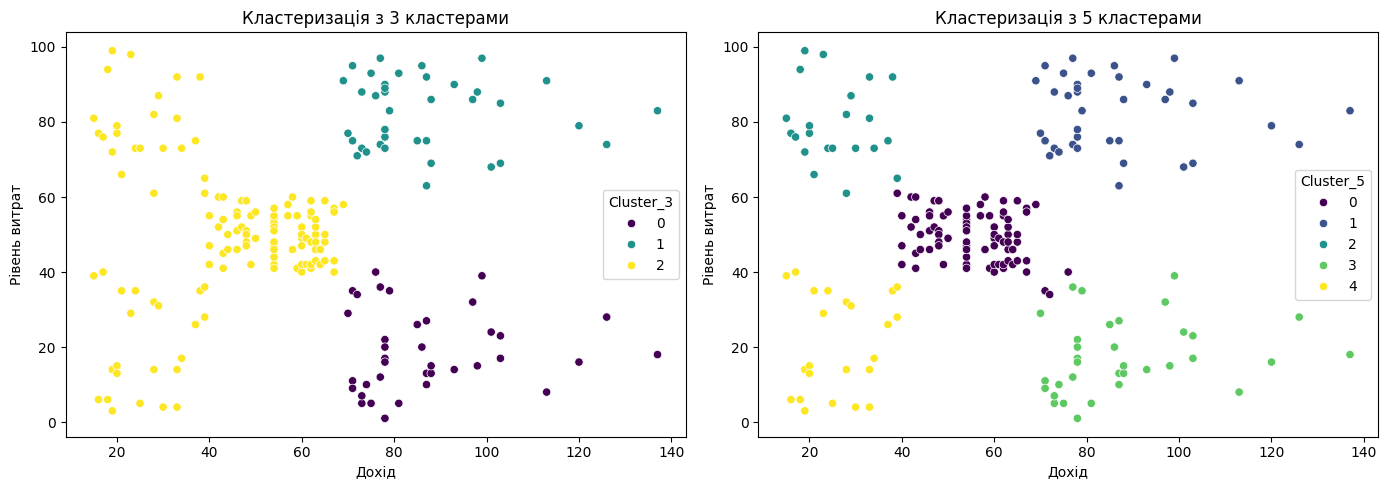

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Застосовуємо метод KMeans для кластеризації з різною кількістю кластерів
kmeans_3_clusters = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_5_clusters = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Проводимо кластеризацію та присвоюємо кожному спостереженню мітку кластеру
customer_set['Cluster_3'] = kmeans_3_clusters.fit_predict(X[['Income', 'SpendingScore']])
customer_set['Cluster_5'] = kmeans_5_clusters.fit_predict(X[['Income', 'SpendingScore']])

# Побудова двовимірних візуалізацій для обох кількостей кластерів
plt.figure(figsize=(14, 5))

# Візуалізація для 3 кластерів
plt.subplot(1, 2, 1)
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Cluster_3', palette='viridis', legend='full')
plt.title('Кластеризація з 3 кластерами')
plt.xlabel('Дохід')
plt.ylabel('Рівень витрат')

# Візуалізація для 5 кластерів
plt.subplot(1, 2, 2)
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Cluster_5', palette='viridis', legend='full')
plt.title('Кластеризація з 5 кластерами')
plt.xlabel('Дохід')
plt.ylabel('Рівень витрат')

plt.tight_layout()
plt.show()


**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [13]:
import plotly.graph_objects as go

# Створення візуалізації для 3 кластерів
fig = go.Figure(data=[go.Scatter3d(
    x=customer_set['Income'][customer_set['Cluster_3'] == 0],
    y=customer_set['SpendingScore'][customer_set['Cluster_3'] == 0],
    z=customer_set['Age'][customer_set['Cluster_3'] == 0],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    ),
    name='Cluster 1'
),
    go.Scatter3d(
        x=customer_set['Income'][customer_set['Cluster_3'] == 1],
        y=customer_set['SpendingScore'][customer_set['Cluster_3'] == 1],
        z=customer_set['Age'][customer_set['Cluster_3'] == 1],
        mode='markers',
        marker=dict(
            size=5,
            color='green',
            opacity=0.8
        ),
        name='Cluster 2'
    ),
    go.Scatter3d(
        x=customer_set['Income'][customer_set['Cluster_3'] == 2],
        y=customer_set['SpendingScore'][customer_set['Cluster_3'] == 2],
        z=customer_set['Age'][customer_set['Cluster_3'] == 2],
        mode='markers',
        marker=dict(
            size=5,
            color='red',
            opacity=0.8
        ),
        name='Cluster 3'
    )
])

# Налаштування відображення
fig.update_layout(
    scene=dict(
        xaxis_title='Дохід',
        yaxis_title='Рівень витрат',
        zaxis_title='Вік'
    ),
    title='Кластеризація з 3 кластерами',
)

fig.show()

# Створення візуалізації для 5 кластерів
fig = go.Figure(data=[go.Scatter3d(
    x=customer_set['Income'][customer_set['Cluster_5'] == 0],
    y=customer_set['SpendingScore'][customer_set['Cluster_5'] == 0],
    z=customer_set['Age'][customer_set['Cluster_5'] == 0],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    ),
    name='Cluster 1'
),
    go.Scatter3d(
        x=customer_set['Income'][customer_set['Cluster_5'] == 1],
        y=customer_set['SpendingScore'][customer_set['Cluster_5'] == 1],
        z=customer_set['Age'][customer_set['Cluster_5'] == 1],
        mode='markers',
        marker=dict(
            size=5,
            color='green',
            opacity=0.8
        ),
        name='Cluster 2'
    ),
    go.Scatter3d(
        x=customer_set['Income'][customer_set['Cluster_5'] == 2],
        y=customer_set['SpendingScore'][customer_set['Cluster_5'] == 2],
        z=customer_set['Age'][customer_set['Cluster_5'] == 2],
        mode='markers',
        marker=dict(
            size=5,
            color='red',
            opacity=0.8
        ),
        name='Cluster 3'
    ),
    go.Scatter3d(
        x=customer_set['Income'][customer_set['Cluster_5'] == 3],
        y=customer_set['SpendingScore'][customer_set['Cluster_5'] == 3],
        z=customer_set['Age'][customer_set['Cluster_5'] == 3],
        mode='markers',
        marker=dict(
            size=5,
            color='orange',
            opacity=0.8
        ),
        name='Cluster 4'
    ),
    go.Scatter3d(
        x=customer_set['Income'][customer_set['Cluster_5'] == 4],
        y=customer_set['SpendingScore'][customer_set['Cluster_5'] == 4],
        z=customer_set['Age'][customer_set['Cluster_5'] == 4],
        mode='markers',
        marker=dict(
            size=5,
            color='purple',
            opacity=0.8
        ),
        name='Cluster 5'
    )
])

# Налаштування відображення
fig.update_layout(
    scene=dict(
        xaxis_title='Дохід',
        yaxis_title='Рівень витрат',
        zaxis_title='Вік'
    ),
    title='Кластеризація з 5 кластерами',
)

fig.show()


**Висновки з завдання 10 - 11 (детальні)** 

1. На мою думку, з отриманих візуалізацій оптимальною кількістю кластерів є 5. У візуалізації з 5 кластерами можна спостерігати чітку відмінність між кластерами, де кожен кластер має свою характеристику щодо рівня витрат та доходу. Наприклад, є кластери з високим доходом та високим рівнем витрат, а також кластери з низькими показниками обох цих параметрів. Така кількість кластерів дозволяє краще розуміти поведінку клієнтів та групувати їх за подібними характеристиками.

2. Детальний аналіз кластерів показує, що:
   - Кластер 1 містить клієнтів з високим доходом і високим рівнем витрат. Це можуть бути високодоходні особи, які активно використовують послуги торгового центру або мають високий рівень потреби у товарах і послугах.
   - Кластер 2 має середні показники доходу та рівня витрат. Це можуть бути люди з середнім класом, які здійснюють покупки на основні потреби та можливо трохи більше.
   - Кластер 3 складається з осіб з низьким доходом, але високим рівнем витрат. Це можуть бути особи з низьким доходом, які намагаються компенсувати це великими витратами або можуть бути в основному молодими людьми, які тимчасово мають низький дохід, але витрачають більше на розваги та розваги.
   - Кластер 4 складається з осіб з низькими показниками як доходу, так і рівня витрат. Це можуть бути особи з низьким доходом, які обмежують свої витрати та в основному приділяють гроші на основні потреби.
   - Кластер 5 має високий дохід, але низький рівень витрат. Це можуть бути особи з високими доходами, які приділяють менше уваги розвагам та розкошам і здійснюють обдумані покупки.

3. Результати аналізу вказують на те, що витрати клієнтів значно відрізняються в залежності від їх доходу та, можливо, інших факторів, таких як вік або стан сім'ї. Розуміння цих різноманітних груп клієнтів дозволяє бізнесу краще налаштовувати свою стратегію маркетингу та обслуговування клієнтів для кожної з них.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


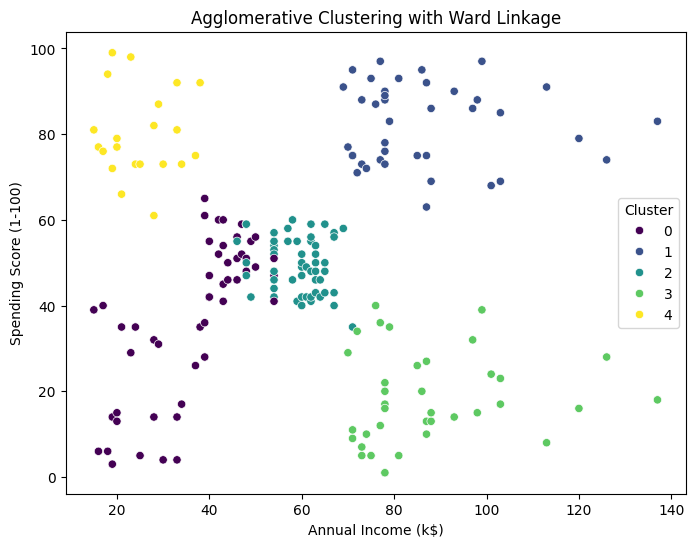

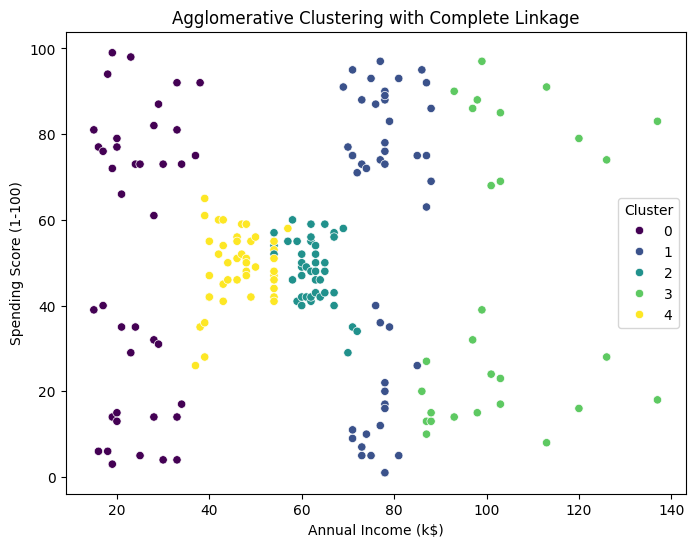

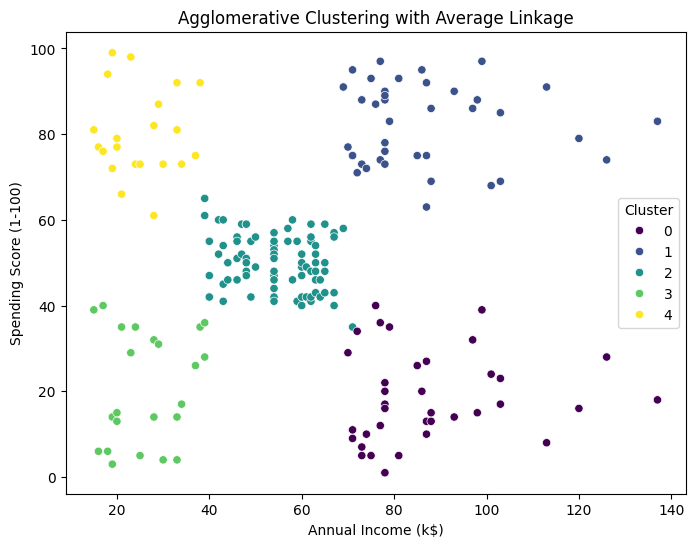

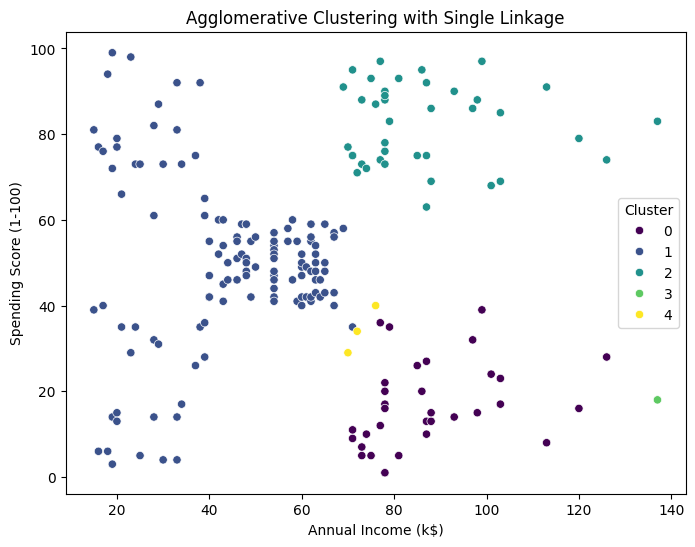

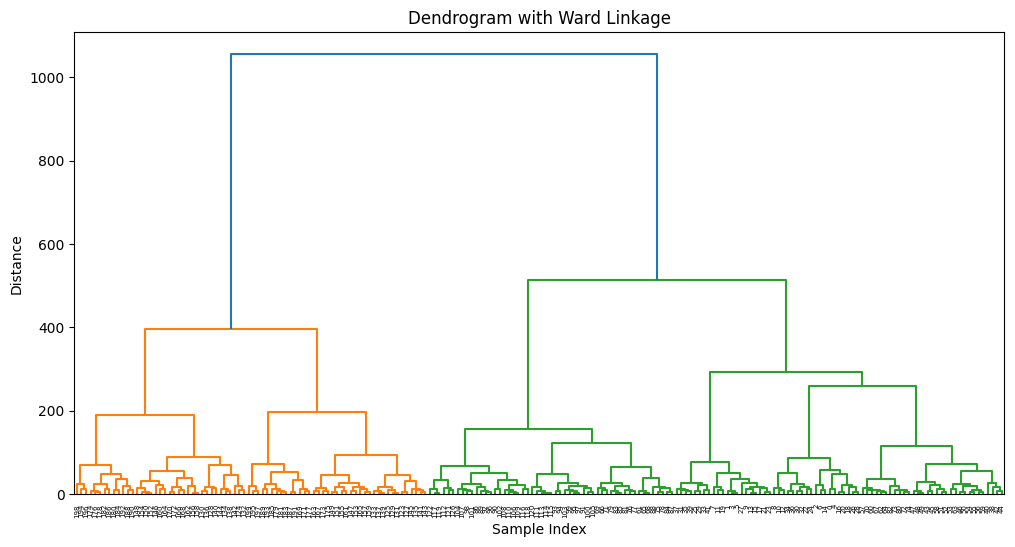

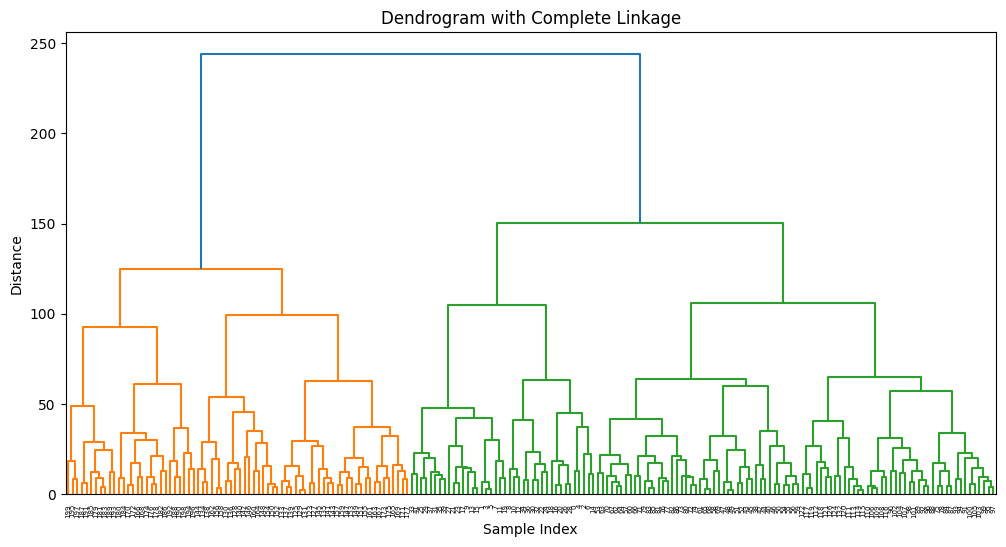

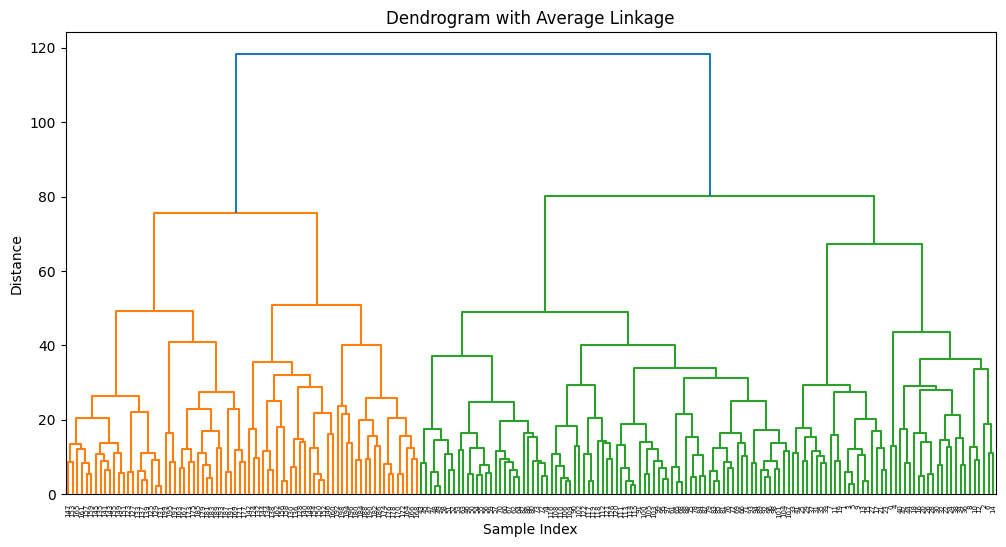

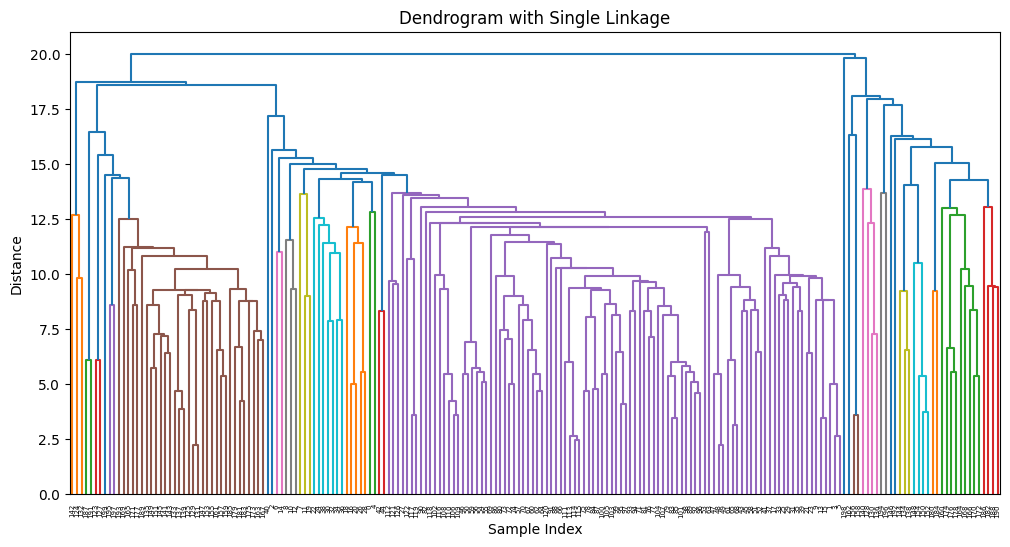

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

# Завантаження даних
customer_set = pd.read_csv("Mall_Customers.csv")

# Видалення стовпця 'Gender'
X = customer_set.drop(['Gender'], axis=1)

# Параметри для кластеризації
n_clusters = 5
linkage_methods = ['ward', 'complete', 'average', 'single']

# Кластеризація з різними методами linkage
for method in linkage_methods:
    # Кластеризація
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    model.fit(X)
    
    # Візуалізація кластерів
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=model.labels_, data=customer_set, palette='viridis')
    plt.title(f'Agglomerative Clustering with {method.capitalize()} Linkage')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend(title='Cluster')
    plt.show()

# Розрахунок матриці відстаней і побудова дендрограми
distances = hierarchy.distance.pdist(X)
for method in linkage_methods:
    # Розрахунок зв'язків
    links = hierarchy.linkage(distances, method=method)
    
    # Візуалізація дендрограми
    plt.figure(figsize=(12, 6))
    hierarchy.dendrogram(links)
    plt.title(f'Dendrogram with {method.capitalize()} Linkage')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()


**Висновки з завдання 12 (детальні)**

Після застосування агломеративної ієрархічної кластеризації з різними методами зв'язку (ward, complete, average, single), ми отримали різні розбиття на кластери для набору даних "Mall Customers". 

На основі візуалізацій кластерів можна зробити такі висновки:

1. **Кількість кластерів**: Кількість кластерів може бути обрана в залежності від специфіки дослідження та вимог. Наший розглянутому наборі даних, різні методи кластеризації показують схильність до різної кількості кластерів. Наприклад, метод зв'язку "ward" наводить на побудову більшого числа кластерів порівняно з іншими методами.

2. **Розподіл кластерів**: Кожен метод кластеризації веде до різних розподілів кластерів у просторі ознак (Annual Income та Spending Score). Деякі методи можуть виділяти кластери зі схожими значеннями ознак, тоді як інші можуть створювати більш змішані групи.

3. **Стабільність кластерів**: Деякі методи кластеризації можуть бути більш стабільними, тобто різні запуски алгоритму можуть давати більш схожі результати, ніж інші методи.

Загалом, вибір методу кластеризації та кількості кластерів варіюється від задачі до задачі і може вимагати додаткового дослідження та експериментів для знаходження найбільш оптимального розбиття на кластери.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

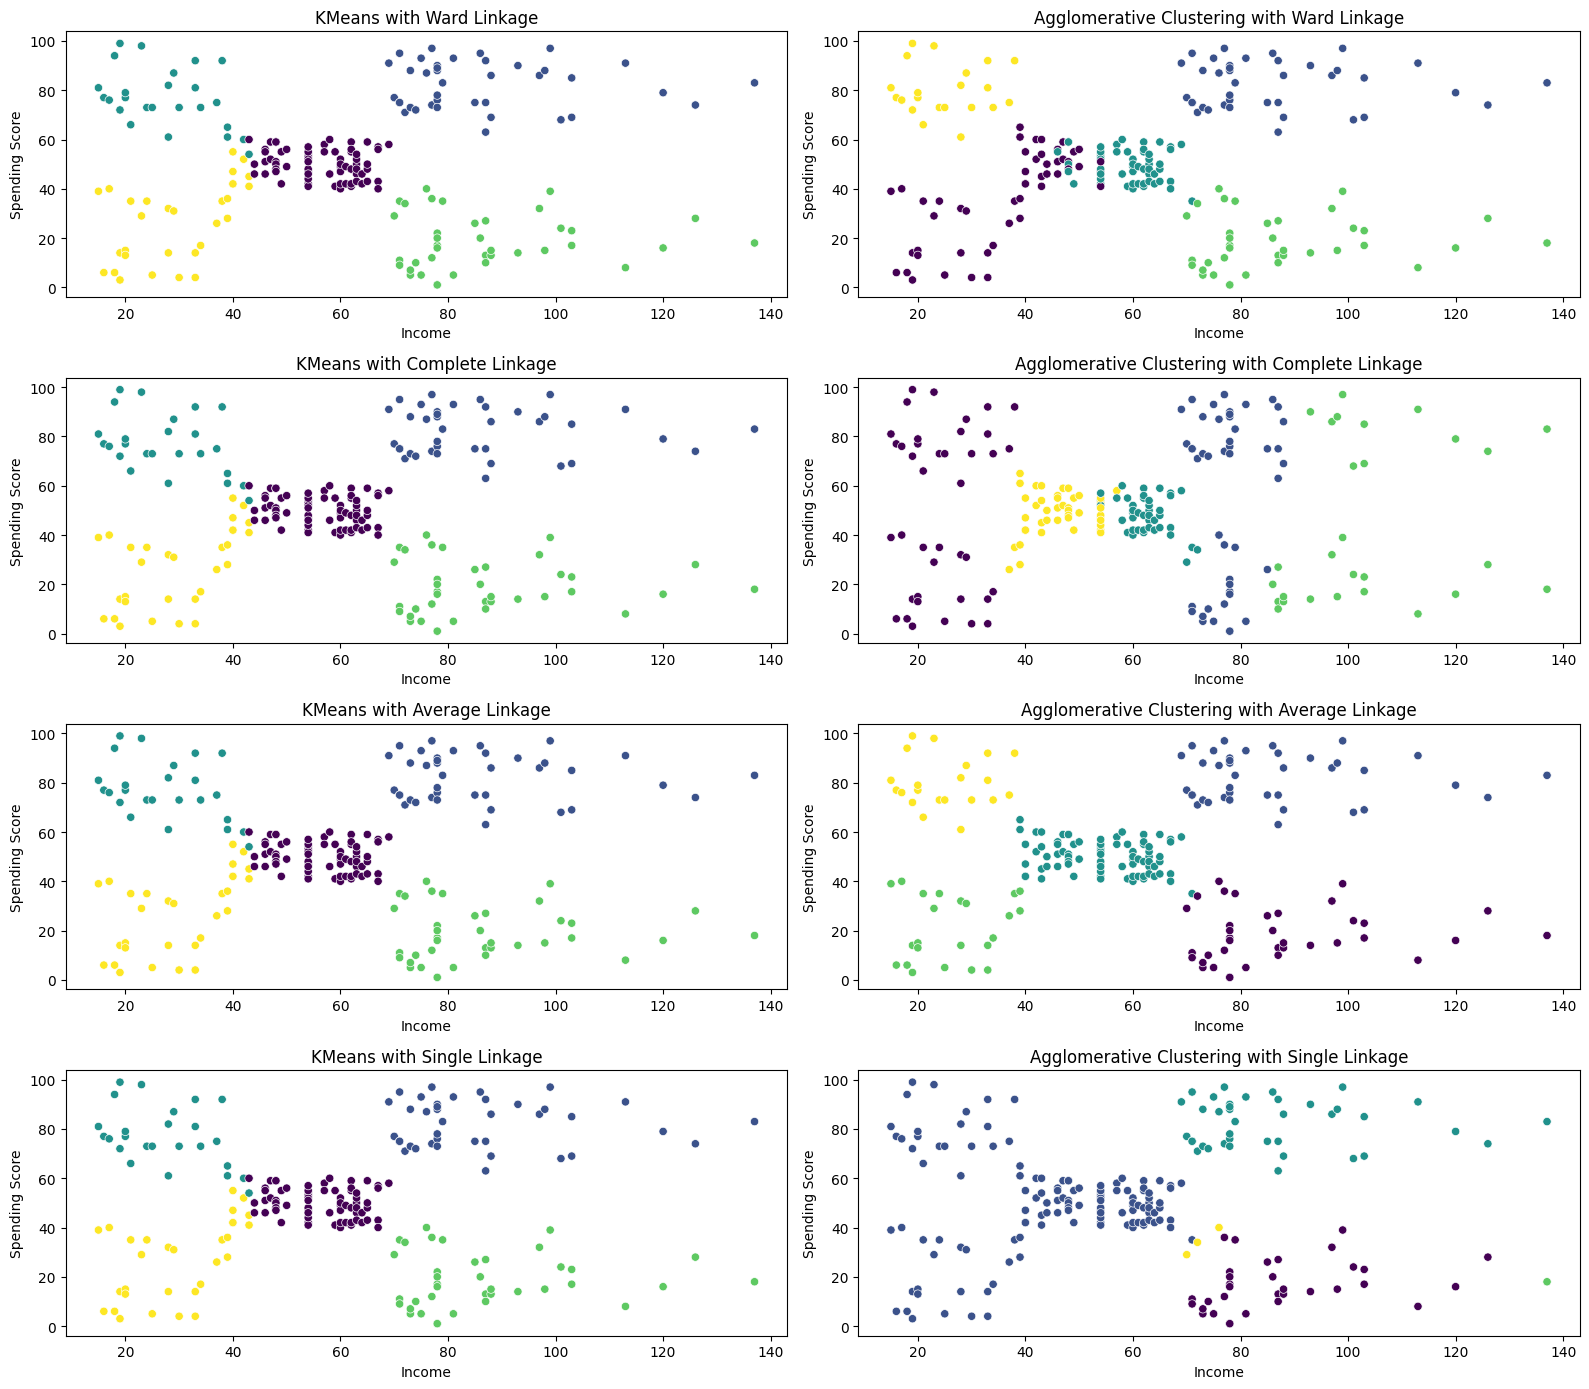

In [20]:
# Кількість кластерів
n_clusters = 5

# Моделі KMeans з різними методами зв'язку
kmeans_methods = ['ward', 'complete', 'average', 'single']
kmeans_models = [KMeans(n_clusters=n_clusters, random_state=42).fit(X) for method in kmeans_methods]

# Моделі AgglomerativeClustering з різними методами зв'язку
agglom_methods = ['ward', 'complete', 'average', 'single']
agglom_models = [AgglomerativeClustering(n_clusters=n_clusters, linkage=method).fit(X) for method in agglom_methods]

# Візуалізація результатів
plt.figure(figsize=(16, 14))

for i, model in enumerate(kmeans_models):
    plt.subplot(4, 2, i*2 + 1)
    plt.title(f'KMeans with {kmeans_methods[i].capitalize()} Linkage')
    sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=model.labels_, palette='viridis', legend=False)
    plt.xlabel('Income')
    plt.ylabel('Spending Score')

for i, model in enumerate(agglom_models):
    plt.subplot(4, 2, i*2 + 2)
    plt.title(f'Agglomerative Clustering with {agglom_methods[i].capitalize()} Linkage')
    sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=model.labels_, palette='viridis', legend=False)
    plt.xlabel('Income')
    plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()


**Висновки з завдання 13 (детальні)**

Після порівняльного аналізу результатів кластеризації методами KMeans і агломеративною ієрархічною кластеризацією можна зробити такі висновки:

1. **Подібність результатів**: У загальних рисах результати обох методів схожі. В обох випадках, кластери сформовані за ознаками доходу та витрат, та є досить чітко видимі в графіках розсіювання.

2. **Відмінності у кількості кластерів**: При виборі однакової кількості кластерів (у цьому випадку 5) результати з обох методів показують схожість. Однак, можливо, метод KMeans трохи чіткіший у формуванні кластерів, особливо коли вони розділені за границями. 

3. **Швидкість виконання**: Зазвичай KMeans працює швидше за агломеративну кластеризацію, особливо при великій кількості спостережень.

4. **Чутливість до вихідних параметрів**: Обидва методи можуть показати різні результати в залежності від вибору параметрів, таких як кількість кластерів та метод зв'язку. Наприклад, при зміні кількості кластерів або методу зв'язку результати можуть суттєво відрізнятися.

У цілому, вибір між методами KMeans і агломеративною ієрархічною кластеризацією може залежати від конкретної задачі, обсягу даних та потреб в швидкості виконання.